## Regression

#### cross validation

`Cross validation` set is a dubset (next to train and test) made to additionally test the mode performance by testing the best choice of `engineered features` or `model architecture`

Only the final model shouls be tested on the `test set`

In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [3]:
#np.save('outfile', data)
data=np.load('data/data2.npy')

In [4]:
x=data[:,0]
y=data[:,1]
x=np.expand_dims(x,axis=1)
y=np.expand_dims(y,axis=1)

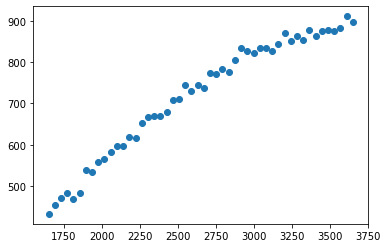

In [5]:
plt.scatter(x,y)

In [6]:
x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.4,random_state=1)
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.5,random_state=1)
print(f'training: {x_train.shape}, {y_train.shape}' )
print(f'cv: {x_cv.shape}, {y_cv.shape}' )
print(f'test: {x_test.shape}, {y_test.shape}' )

training: (30, 1), (30, 1)
cv: (10, 1), (10, 1)
test: (10, 1), (10, 1)


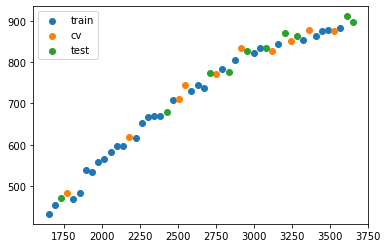

In [7]:
plt.scatter(x_train,y_train,label='train')
plt.scatter(x_cv,y_cv,label='cv')
plt.scatter(x_test,y_test,label='test')
plt.legend()

#### feature scaling

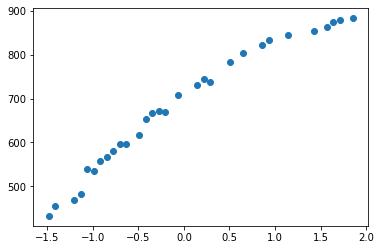

In [8]:
scaler_linear=StandardScaler()
x_train_scaled=scaler_linear.fit_transform(x_train)
plt.scatter(x_train_scaled,y_train)

In [9]:
linear_model=LinearRegression()
linear_model.fit(x_train_scaled,y_train)

LinearRegression()

#### evalueate model

In [10]:
y_hat=linear_model.predict(x_train_scaled)
error=mean_squared_error(y_train,y_hat)/2
print(f'scikit error: {error}')
total_squared_error=0
for i in range(len(y_hat)):
    squared_error=(y_hat[i]-y_train[i])**2
    total_squared_error+=squared_error
mse=total_squared_error/(2*len(y_hat))
print(f'for loop error: {mse[0]}')

scikit error: 406.1814264310123
for loop error: 406.1814264310123


#### scaling cv

In [11]:
x_cv_scaled=scaler_linear.transform(x_cv)
print(f'mean: {scaler_linear.mean_}')
print(f'scale: {scaler_linear.scale_}')

mean: [2504.06166667]
scale: [574.85344565]


In [12]:
y_hat=linear_model.predict(x_cv_scaled)
error=mean_squared_error(y_cv,y_hat)/2
print(f'scikit error: {error}')

scikit error: 551.7633686764401


#### adding polynomial features

In [13]:
poly=PolynomialFeatures(degree=2,include_bias=False)
x_train_mapped=poly.fit_transform(x_train)
x_train_mapped[:3]

array([[3.32447000e+03, 1.10521008e+07],
       [2.34488000e+03, 5.49846221e+06],
       [3.48773000e+03, 1.21642606e+07]])

In [14]:
scaler_poly=StandardScaler()
x_train_mapped_scaled=scaler_poly.fit_transform(x_train_mapped)
x_train_mapped_scaled[:3]

array([[ 1.42716085,  1.47236975],
       [-0.27690826, -0.36461578],
       [ 1.71116367,  1.84024054]])

In [15]:
model=LinearRegression()
model.fit(x_train_mapped_scaled,y_train)

LinearRegression()

In [16]:
y_hat=model.predict(x_train_mapped_scaled)
error=mean_squared_error(y_train,y_hat)/2
print(f'scikit error train: {error}')

scikit error train: 49.115763074720654


In [17]:
x_cv_mapped=poly.transform(x_cv)
x_cv_mapped_scaled=scaler_poly.transform(x_cv_mapped)
y_hat=model.predict(x_cv_mapped_scaled)
error=mean_squared_error(y_cv,y_hat)/2
print(f'scikit error cv: {error}')

scikit error cv: 87.6946643843581


In [18]:
error_train=np.zeros(10)
error_cv=np.zeros(10)
for i in range(1,11):
    poly=PolynomialFeatures(degree=i,include_bias=False)
    x_train_mapped=poly.fit_transform(x_train)
    x_cv_mapped=poly.transform(x_cv)
    
    scaler_poly=StandardScaler()
    x_train_mapped_scaled=scaler_poly.fit_transform(x_train_mapped)
    x_cv_mapped_scaled=scaler_poly.transform(x_cv_mapped)
    
    model=LinearRegression()
    model.fit(x_train_mapped_scaled,y_train)
    y_hat=model.predict(x_train_mapped_scaled)
    error_train[i-1]=mean_squared_error(y_train,y_hat)/2
    #print(f'scikit error train: {error}')
    y_hat=model.predict(x_cv_mapped_scaled)
    error_cv[i-1]=mean_squared_error(y_cv,y_hat)/2
    #print(f'scikit error cv: {error}')

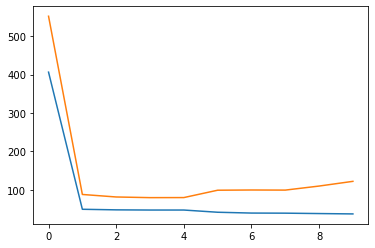

In [19]:
plt.plot(error_train)
plt.plot(error_cv)

In [22]:
degree=np.argmin(error_cv)+1
print(f'Lowest cv mse for degree {degree}')

Lowest cv mse for degree 4


## Neural networks

#### data

In [23]:
data=np.load('data/data2.npy')
x=data[:,0]
y=data[:,1]
x=np.expand_dims(x,axis=1)
y=np.expand_dims(y,axis=1)
x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.4,random_state=1)
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.5,random_state=1)
print(f'training: {x_train.shape}, {y_train.shape}' )
print(f'cv: {x_cv.shape}, {y_cv.shape}' )
print(f'test: {x_test.shape}, {y_test.shape}' )

training: (30, 1), (30, 1)
cv: (10, 1), (10, 1)
test: (10, 1), (10, 1)


In [24]:
degree=1
poly=PolynomialFeatures(degree=i,include_bias=False)
x_train_mapped=poly.fit_transform(x_train)
x_cv_mapped=poly.transform(x_cv)
x_test_mapped=poly.transform(x_test)

In [25]:
scaler=StandardScaler()
x_train_mapped_scaled=scaler.fit_transform(x_train)
x_cv_mapped_scaled=scaler.transform(x_cv)
x_test_mapped_scaled=scaler.transform(x_test)

#### model

In [29]:
model1=tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(1,)),
        tf.keras.layers.Dense(25,activation='relu'),
        tf.keras.layers.Dense(15,activation='relu'),
        tf.keras.layers.Dense(1,activation='linear'),
    ]
)

In [30]:
model2=tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(1,)),
        tf.keras.layers.Dense(20,activation='relu'),
        tf.keras.layers.Dense(12,activation='relu'),
        tf.keras.layers.Dense(12,activation='relu'),
        tf.keras.layers.Dense(20,activation='relu'),
        tf.keras.layers.Dense(1,activation='linear'),
    ]
)

In [31]:
model3=tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(1,)),
        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dense(8,activation='relu'),
        tf.keras.layers.Dense(4,activation='relu'),
        tf.keras.layers.Dense(12,activation='relu'),
        tf.keras.layers.Dense(1,activation='linear'),
    ]
)

In [32]:
models=[model1,model2,model3]

In [33]:
for model in models:
    model.compile(
        loss='mse',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)
    )
    print(f'model: {model.name}')
    model.fit(x_train_mapped_scaled,y_train,epochs=300,verbose=0)
    y_hat=model.predict(x_train_mapped_scaled)
    train_mse=mean_squared_error(y_train,y_hat)/2
    y_hat=model.predict(x_cv_mapped_scaled)
    cv_mse=mean_squared_error(y_cv,y_hat)/2
    print(f'model: {model.name}, train_mse: {train_mse}, cv_mse: {cv_mse}')

model: sequential
1/1 [==============================] - 0s 19ms/step
model: sequential, train_mse: 290.6960992636929, cv_mse: 405.38707874024806
model: sequential_1
1/1 [==============================] - 0s 18ms/step
model: sequential_1, train_mse: 406.1814318413952, cv_mse: 551.7655102201547
model: sequential_2
1/1 [==============================] - 0s 17ms/step
model: sequential_2, train_mse: 73.39741560053746, cv_mse: 112.2800487127223


### Classification

In [60]:
#np.save('data/data3.npy', data)
data=np.load('data/data3.npy')

In [109]:
x_bc=data[:,:-1]
y_bc=data[:,-1]
y_bc=np.expand_dims(y_bc,axis=1)

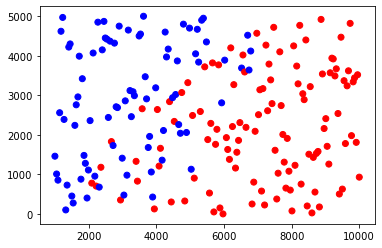

In [114]:
col = np.where(y_bc[:,0]<1,'b','r')
plt.scatter(x_bc[:,0],x_bc[:,1],color=col)

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
x_bc_train,x_,y_bc_train,y_=train_test_split(x_bc,y_bc,test_size=0.4,random_state=1)
x_bc_cv,x_bc_test,y_bc_cv,y_bc_test=train_test_split(x_,y_,test_size=0.5,random_state=1)

print(f'training: {x_bc_train.shape}, {y_bc_train.shape}' )
print(f'cv: {x_bc_cv.shape}, {y_bc_cv.shape}' )
print(f'test: {x_bc_test.shape}, {y_bc_test.shape}' )

training: (120, 2), (120, 1)
cv: (40, 2), (40, 1)
test: (40, 2), (40, 1)


#### scaling

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
scaler_linear=StandardScaler()
x_bc_train_scaled=scaler_linear.fit_transform(x_bc_train)
x_bc_cv_scaled=scaler_linear.fit_transform(x_bc_cv)
x_bc_test_scaled=scaler_linear.fit_transform(x_bc_test)

In [119]:
model1=tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(25,activation='relu'),
        tf.keras.layers.Dense(15,activation='relu'),
        tf.keras.layers.Dense(1,activation='linear'),
    ]
)

In [120]:
model2=tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(20,activation='relu'),
        tf.keras.layers.Dense(12,activation='relu'),
        tf.keras.layers.Dense(12,activation='relu'),
        tf.keras.layers.Dense(20,activation='relu'),
        tf.keras.layers.Dense(1,activation='linear'),
    ]
)

In [121]:
model3=tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dense(8,activation='relu'),
        tf.keras.layers.Dense(4,activation='relu'),
        tf.keras.layers.Dense(12,activation='relu'),
        tf.keras.layers.Dense(1,activation='linear'),
    ]
)

In [122]:
models=[model1,model2,model3]

In [123]:
for model in models:
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    )
    model.fit(
        x_bc_train_scaled,y_bc_train,epochs=200,verbose=0
    )
    
    y_hat=model.predict(x_bc_train_scaled)
    y_hat=tf.math.sigmoid(y_hat)
    y_hat=np.where(y_hat>=0.5,1,0)
    train_error=np.mean(y_hat!=y_bc_train)
    
    y_hat=model.predict(x_bc_cv_scaled)
    y_hat=tf.math.sigmoid(y_hat)
    y_hat=np.where(y_hat>=0.5,1,0)
    cv_error=np.mean(y_hat!=y_bc_cv)
    print(f'model: {model.name}, train_error: {train_error:.4f}, cv_error: {cv_error:.4f}')

2/2 [==============================] - 0s 2ms/step
model: sequential_15, train_error: 0.0833, cv_error: 0.1000
2/2 [==============================] - 0s 3ms/step
model: sequential_16, train_error: 0.0667, cv_error: 0.2250
2/2 [==============================] - 0s 2ms/step
model: sequential_17, train_error: 0.0500, cv_error: 0.2750


# Bias and variance

`high bias` -  model generalizes too much

to address `high bias`: get additional features, add polymonial features, decrease lambda

`high variande` - model fits data too much

to address `high variance`: get more data, remove some fatures, increase lambda

if the mosel performs bad on both train and cv set the the bias is too high

if the model has good train preformance and bad cv performance it has too high variance

### regularization

if $ {\lambda} $ is very big, the polynomial wx+b will torn into a flat line b (w will be very small) -> `high bias`

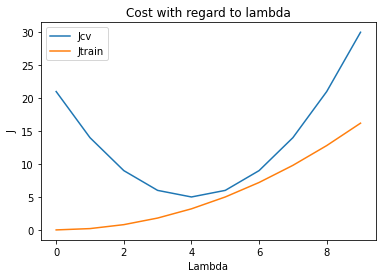

In [145]:
x=np.arange(10)
plt.plot(x,(x-4)**2+5,label='Jcv')
plt.plot(x,0.2*x**2,label='Jtrain')
plt.title('Cost with regard to lambda')
plt.ylabel('J')
plt.xlabel('Lambda')
plt.legend()
#left high variance, right high bias

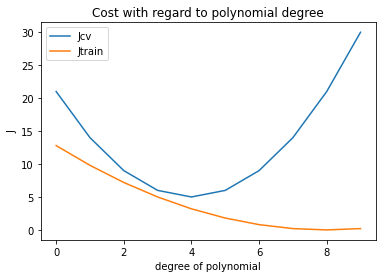

In [146]:
x=np.arange(10)
plt.plot(x,(x-4)**2+5,label='Jcv')
plt.plot(x,0.2*(x-8)**2,label='Jtrain')
plt.title('Cost with regard to polynomial degree')
plt.ylabel('J')
plt.xlabel('degree of polynomial')
plt.legend()
#left high bias, right high variance

### Precision

$$ \dfrac {TP}{TP+FP} $$

### Recall

$$ \dfrac {TP}{TP+FN} $$

### F1 score

$$ F_1 score = \dfrac {2*Precision*Recall}{Precision+Recall} $$

The higher F1 score the better

## Practice lab

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
tf.keras.backend.set_floatx('float64')
tf.autograph.set_verbosity(0)

### Linear regression

#### data

In [41]:
x=np.array([ 0.  ,  2.88,  5.76,  8.65, 11.53, 14.41, 17.29, 20.18, 23.06, 25.94, 28.82, 31.71, 34.59, 37.47, 40.35, 43.24, 46.12, 49. ])
y=np.array([   0.  ,    5.55,   34.39,   71.39,  125.52,  183.03,  237.25,441.08,  457.14,  563.11,  901.24, 1025.77,  890.33, 1417.39,1268.67, 2242.65, 2653.83, 2391.31])
y_ideal=np.array([   0.  ,    8.31,   33.23,   74.77,  132.93,  207.7 ,  299.09,407.09,  531.71,  672.94,  830.8 , 1005.26, 1196.35, 1404.04,1628.36, 1869.29, 2126.84, 2401.])

In [54]:
x=np.expand_dims(x,axis=1)
y=np.expand_dims(y,axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)
print(f'training: {x.shape}, {y.shape}' )
print(f'training: {x_train.shape}, {y_train.shape}' )
print(f'test: {x_test.shape}, {y_test.shape}' )

training: (18, 1, 1), (18, 1, 1)
training: (12, 1, 1), (12, 1, 1)
test: (6, 1, 1), (6, 1, 1)


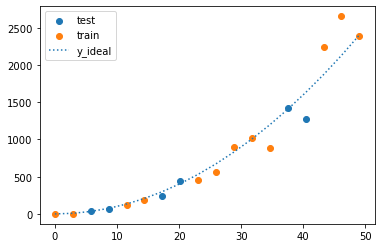

In [53]:
plt.scatter(x_test,y_test,label='test')
plt.scatter(x_train,y_train,label='train')
plt.plot(x,y_ideal,linestyle=':',label='y_ideal')
plt.legend()

#### feature enginnering

In [44]:
degree=10
poly=PolynomialFeatures(degree=degree,include_bias=False)
x_train_mapped=poly.fit_transform(x_train)
x_test_mapped=poly.transform(x_test)

#### model

In [45]:
model=LinearRegression()
model.fit(x_train_mapped,y_train)

LinearRegression()

In [51]:
model.coef_

array([[-3.87597422e-01, -1.47270363e+00, -4.17260097e+00,
         1.30822853e+00, -1.56422613e-01,  9.71849165e-03,
        -3.43409855e-04,  6.95611659e-06, -7.52373988e-08,
         3.36851976e-10]])

In [46]:
y_hat=model.predict(x_train_mapped)
err_train=mean_squared_error(y_train,y_hat)/2
y_hat=model.predict(x_test_mapped)
err_test=mean_squared_error(y_test,y_hat)/2
print(f'train: {err_train}')
print(f'test: {err_test}')

train: 787.1373595558758
test: 23141.040132954397


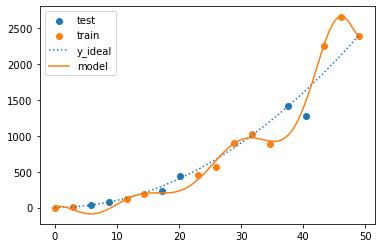

In [52]:
x_=np.linspace(0,int(x.max()),100)
x_=np.expand_dims(x_,axis=1)
x_mapped=poly.fit_transform(x_)
y_pred=model.predict(x_mapped).reshape(-1,1)
plt.scatter(x_test,y_test,label='test')
plt.scatter(x_train,y_train,label='train')
plt.plot(x,y_ideal,linestyle=':',label='y_ideal')
plt.plot(x_,y_pred,label='model')
plt.legend()


### Neural Network

#### data

In [63]:
x=np.array([[-1.60e+00,1.05e+00],[-1.84e+00,-7.68e-01],[9.31e-01,-1.58e-01],[-1.18e+00,2.06e-01],[4.71e-02,7.85e-01],[-2.14e+00,5.74e-01],[5.78e-01,-4.73e-01],[-7.99e-01,-3.38e-01],[-1.44e+00,6.34e-01],[-1.45e+00,-7.21e-01],[-2.27e-01,-1.66e+00],[-1.49e+00,-8.60e-01],[-1.61e+00,-7.73e-01],[-2.57e+00,8.17e-01],[7.59e-01,1.68e-02],[-2.00e+00,6.34e-01],[1.20e+00,-9.39e-01],[9.74e-01,3.06e-01],[1.72e+00,-8.23e-01],[9.23e-01,-1.25e+00],[-1.84e+00,4.45e-01],[-2.07e+00,-5.62e-01],[-1.84e+00,7.22e-01],[-2.52e+00,-1.84e-01],[2.57e-01,-1.30e+00],[-3.01e+00,8.34e-01],[-3.76e-01,-3.21e-01],[5.22e-01,-1.95e-01],[-2.59e+00,-1.05e+00],[1.55e+00,5.93e-02],[1.30e-02,-1.32e+00],[9.93e-01,9.44e-02],[-2.45e-01,4.43e-01],[-2.03e+00,1.10e+00],[9.95e-01,8.19e-01],[1.66e+00,1.25e-01],[2.25e-01,8.74e-01],[-2.66e-01,1.76e-01],[3.84e-01,1.45e+00],[-5.87e-01,-1.32e-01],[-3.54e-01,-1.43e+00],[6.36e-01,4.71e-01],[-2.22e+00,4.13e-01],[5.73e-01,-2.61e-01],[6.85e-01,1.70e-01],[-1.60e-01,-8.06e-01],[-8.77e-01,-7.60e-01],[-1.28e+00,-3.72e-01],[-2.36e+00,-1.62e+00],[1.15e-01,1.28e+00],[-2.00e+00,7.30e-01],[1.46e+00,-6.08e-02],[9.33e-01,-2.31e-01],[1.23e+00,2.87e-01],[-4.12e-02,1.27e+00],[1.66e-01,5.91e-01],[-1.14e+00,-9.45e-02],[-1.49e+00,7.38e-01],[2.18e-01,-9.83e-01],[5.65e-01,-9.24e-02],[-1.85e+00,1.11e+00],[4.49e-01,4.74e-01],[-1.83e-01,7.06e-01],[2.28e-01,-1.22e+00],[-1.25e+00,2.03e-01],[1.28e+00,-7.20e-01],[-1.58e+00,-1.29e+00],[-2.22e+00,-9.53e-01],[-8.49e-01,-5.42e-02],[3.54e-01,1.06e+00],[-7.01e-02,-1.10e+00],[2.79e-01,-1.27e+00],[-1.39e-02,1.28e+00],[-1.06e+00,6.01e-01],[8.62e-01,-8.01e-01],[-2.18e+00,-1.26e+00],[1.06e+00,-1.60e-01],[-6.80e-01,5.05e-01],[1.70e-01,-6.35e-01],[-2.31e+00,-1.33e+00],[1.56e-01,-1.02e+00],[9.40e-01,-9.70e-02],[1.60e+00,-6.12e-01],[-1.22e+00,3.18e-01],[-8.66e-01,7.62e-01],[-1.90e+00,7.69e-01],[-6.52e-01,-4.35e-01],[-7.84e-01,-2.38e-01],[-3.45e-01,3.03e-01],[-9.03e-01,1.99e-01],[2.27e-01,-1.09e+00],[-2.30e+00,-6.50e-01],[-1.97e+00,4.51e-02],[-1.19e+00,-5.02e-01],[-4.31e-01,9.96e-01],[-2.85e+00,-1.53e+00],[-1.85e+00,-1.13e+00],[-4.60e-01,-7.26e-01],[-2.72e+00,7.06e-01],[-1.69e+00,-9.78e-01],[-1.95e+00,-1.71e+00],[7.55e-01,-1.41e-01],[2.41e-01,9.68e-01],[-2.27e+00,3.75e-01],[-1.01e+00,1.56e+00],[-6.54e-01,-7.64e-01],[1.38e-01,-1.15e+00],[-7.64e-02,7.50e-01],[-5.10e-01,-1.36e+00],[9.99e-01,-5.57e-02],[-1.89e+00,-1.26e+00],[-1.92e+00,1.09e+00],[-1.22e+00,1.20e-01],[-3.18e-01,-6.68e-01],[-1.18e+00,1.40e-01],[-1.28e-01,1.10e+00],[-1.92e+00,-1.60e+00],[4.30e-01,-2.02e-01],[-8.41e-01,-1.26e-01],[1.76e+00,-2.52e-01],[-1.45e+00,9.18e-01],[-9.66e-01,2.66e-01],[-3.28e-01,8.67e-01],[-1.66e+00,1.18e+00],[-2.24e+00,-1.40e+00],[-1.87e+00,-6.67e-01],[-1.16e+00,-5.54e-01],[-1.58e+00,-1.35e-01],[1.67e-01,-1.06e+00],[1.33e+00,-8.30e-01],[-2.44e-01,-1.08e+00],[-1.85e+00,-9.92e-01],[-1.95e+00,-8.93e-01],[2.39e-02,-1.40e+00],[-1.12e+00,8.58e-01],[-1.63e+00,-8.24e-01],[-2.28e+00,4.97e-01],[4.01e-03,1.19e+00],[-2.07e+00,-1.18e+00],[-2.73e-01,-7.67e-01],[1.25e+00,1.67e-01],[3.35e-01,1.06e+00],[-3.74e-01,1.29e+00],[4.01e-01,-5.22e-01],[-1.66e+00,-1.14e+00],[-1.95e+00,-1.34e+00],[-2.12e+00,1.63e+00],[-1.88e-01,9.62e-01],[-1.17e+00,-5.29e-02],[-8.44e-01,3.90e-01],[-2.01e+00,1.40e+00],[-6.76e-01,4.33e-01],[1.41e+00,-2.89e-01],[-2.26e-01,1.23e+00],[1.33e+00,-2.52e-01],[-1.72e+00,-3.37e-01],[7.85e-01,-4.40e-01],[-1.30e+00,1.29e+00],[-1.55e+00,-1.05e+00],[1.13e+00,-5.82e-01],[1.34e+00,-5.27e-02],[-2.38e+00,-1.04e+00],[-1.42e+00,-3.64e-01],[5.94e-01,-4.46e-01],[1.24e+00,2.20e-01],[7.82e-01,7.37e-02],[9.24e-01,-1.80e-01],[-2.23e+00,1.09e+00],[-2.34e+00,1.55e+00],[-1.16e-02,1.47e+00],[8.95e-01,-2.71e-01],[5.16e-01,1.15e+00],[-1.73e+00,-6.93e-01],[-1.49e+00,6.56e-01],[-7.53e-02,-9.10e-01],[-2.18e+00,9.46e-01],[-6.32e-01,-9.30e-01],[-9.77e-01,6.36e-02],[1.08e+00,-2.84e-02],[5.57e-01,-7.05e-02],[-1.01e+00,4.70e-01],[1.06e+00,3.06e-01],[1.71e-01,1.16e+00],[7.62e-01,-1.26e-01],[-2.15e+00,-6.86e-01],[9.44e-04,1.28e+00],[6.43e-01,3.01e-01],[7.24e-01,-1.08e+00],[-2.23e+00,-1.46e+00],[-1.42e+00,2.37e-01],[-1.79e+00,-1.00e+00],[-9.77e-02,-1.59e+00],[-2.06e+00,1.62e+00],[1.32e+00,-6.49e-01],[1.01e+00,-6.56e-01],[-8.45e-02,3.37e-01],[3.02e-01,-9.86e-01],[-1.23e-01,4.68e-01],[7.91e-02,-8.65e-01],[1.16e-01,9.21e-01],[-1.95e-01,8.69e-01],[1.12e+00,-3.32e-01],[-2.19e+00,-1.62e+00],[1.91e+00,-1.98e-01],[3.40e-01,7.47e-01],[-1.19e-01,-1.45e+00],[-2.12e+00,-1.14e+00],[-2.26e+00,-1.83e+00],[9.52e-01,6.50e-01],[-1.42e+00,-4.34e-02],[-1.70e+00,-1.63e+00],[-1.93e+00,-8.05e-01],[-2.02e+00,8.81e-01],[-1.06e+00,2.20e-01],[1.33e+00,1.34e-01],[-7.27e-01,1.81e+00],[-2.83e-01,-1.72e-01],[-6.67e-01,-9.10e-01],[1.98e-01,-1.11e+00],[-7.34e-01,2.94e-01],[-7.79e-01,-3.36e-01],[-1.88e+00,-2.62e-01],[7.01e-02,-7.41e-01],[-5.35e-01,1.54e-01],[3.97e-01,-6.83e-01],[1.23e+00,-6.58e-02],[4.79e-01,-9.15e-01],[-1.13e+00,3.08e-01],[2.33e-01,-8.91e-01],[3.12e-01,3.88e-01],[7.39e-01,5.64e-01],[-1.62e+00,-8.33e-01],[-2.67e+00,-5.51e-01],[1.50e+00,-4.98e-01],[-1.24e+00,4.60e-01],[-2.25e+00,1.03e+00],[-9.22e-01,-6.41e-01],[1.27e+00,-6.83e-01],[-2.37e+00,1.24e+00],[-1.32e+00,8.48e-01],[-2.21e+00,7.93e-01],[3.01e-01,-7.40e-01],[-1.26e+00,3.37e-01],[6.07e-01,8.35e-01],[-1.19e+00,-4.08e-01],[-1.64e+00,-1.47e+00],[-1.87e+00,-1.52e+00],[-1.51e+00,6.22e-01],[1.31e-01,-3.79e-01],[1.23e+00,-8.15e-03],[-2.82e+00,-1.10e+00],[-9.93e-02,1.04e+00],[-2.57e+00,-1.23e+00],[-7.56e-01,1.69e-01],[5.20e-01,5.99e-01],[1.58e+00,-4.26e-01],[-1.38e-01,9.81e-01],[-2.30e+00,1.24e+00],[1.01e-01,4.78e-01],[1.60e-01,-1.28e+00],[-3.46e-01,1.70e+00],[-1.93e+00,1.62e+00],[-1.17e+00,-2.25e-02],[-1.33e+00,3.51e-02],[-1.98e+00,1.53e+00],[-2.41e+00,-7.17e-01],[6.71e-01,4.68e-01],[-1.61e+00,-1.13e+00],[-6.00e-01,-1.52e-01],[-1.82e+00,1.83e+00],[-1.89e+00,5.19e-01],[-1.59e+00,-1.47e+00],[-3.61e-01,9.97e-01],[-2.19e+00,-1.01e+00],[7.71e-01,1.17e-01],[3.56e-01,2.00e-01],[-2.21e+00,-1.49e+00],[-3.19e-01,1.00e+00],[-7.22e-01,2.79e-01],[1.26e-01,1.75e+00],[9.59e-01,3.39e-01],[-6.16e-01,3.03e-01],[1.03e-01,1.31e+00],[-2.60e-01,2.87e-02],[-2.34e+00,1.75e+00],[2.08e-01,1.15e+00],[-7.59e-01,1.46e-03],[1.33e+00,-1.96e-01],[-1.52e+00,-1.38e+00],[-4.06e-01,-5.01e-01],[-3.73e-02,1.05e+00],[-2.45e+00,-1.03e+00],[8.65e-01,1.26e+00],[-1.85e+00,6.56e-01],[-9.23e-01,-2.65e-01],[-2.12e+00,7.76e-01],[-2.35e+00,-4.40e-01],[5.09e-01,-1.56e+00],[1.65e+00,2.85e-01],[5.46e-01,-1.62e+00],[1.65e+00,1.70e-01],[1.70e-01,-9.24e-01],[1.28e+00,4.56e-02],[9.34e-01,1.49e-01],[2.89e-01,-2.00e-01],[-1.77e+00,1.20e+00],[-1.80e+00,-1.05e+00],[-8.25e-02,-9.76e-01],[-2.47e+00,-1.68e+00],[1.83e-01,9.32e-01],[-2.03e-02,4.66e-01],[3.11e-01,-9.51e-01],[6.31e-01,4.37e-01],[-1.64e-01,-1.09e+00],[-2.17e+00,-9.93e-01],[-4.43e-01,7.64e-01],[-1.88e+00,6.45e-01],[-1.34e+00,-3.41e-01],[-6.07e-01,-4.16e-01],[-1.96e+00,-1.20e+00],[-1.49e+00,-3.41e-01],[-7.79e-01,9.17e-01],[-5.90e-01,-5.85e-01],[-1.59e+00,3.39e-01],[-2.24e+00,1.05e+00],[8.65e-01,1.37e-01],[1.91e-01,1.07e-01],[-2.00e+00,-2.20e+00],[1.46e+00,-1.02e-01],[1.23e-01,7.11e-01],[1.54e-01,-1.08e+00],[3.39e-01,-2.70e-01],[3.97e-01,-1.67e+00],[-1.39e+00,5.94e-01],[-4.99e-01,9.69e-01],[-8.41e-01,6.99e-01],[-2.35e-01,1.69e+00],[-1.90e+00,-1.47e+00],[9.17e-01,5.50e-02],[-6.18e-02,3.00e-01],[-2.96e-01,6.22e-01],[-2.06e+00,-3.66e-02],[-2.45e+00,-6.41e-01],[-1.93e+00,6.95e-01],[3.13e-01,8.37e-01],[3.45e-01,6.38e-01],[-5.56e-01,-7.06e-01],[-1.50e+00,3.75e-01],[-2.29e+00,-8.69e-01],[-1.73e+00,-5.97e-01],[-2.67e+00,7.00e-01],[-1.25e+00,1.52e-01],[7.74e-01,-8.35e-01],[-1.09e+00,-8.28e-01],[1.62e+00,-1.26e-01],[-1.81e+00,-1.39e+00],[9.31e-01,7.46e-01],[4.88e-01,1.24e-01],[-2.09e+00,1.47e+00],[-1.28e+00,9.60e-02],[-2.24e+00,1.06e+00],[-2.06e+00,-1.54e+00],[-1.84e-01,-6.35e-01],[2.81e-01,8.58e-01],[-1.89e+00,4.51e-01],[-2.05e+00,5.68e-01],[6.47e-01,6.18e-01],[-1.02e+00,1.30e-01],[-1.28e+00,-4.91e-01],[-5.33e-01,8.12e-01],[-1.13e+00,-2.24e-01],[-8.62e-02,-1.18e+00],[-7.07e-02,7.19e-02],[-2.31e+00,-6.92e-01],[-2.07e+00,8.39e-01],[1.37e+00,5.87e-01],[1.53e-01,-5.60e-01],[1.40e-02,-9.21e-01],[-2.12e-01,-9.68e-01],[-7.55e-01,1.92e-02],[-1.82e+00,-1.05e+00],[1.16e-01,1.16e+00],[-1.98e-01,-1.41e+00],[-9.52e-01,-3.39e-01],[-2.43e+00,8.98e-01],[-1.99e+00,5.56e-01],[2.87e-01,-8.61e-01],[1.31e+00,-4.22e-01],[-2.58e+00,1.85e+00],[-1.74e+00,1.32e-01],[-2.37e-01,1.12e+00],[-8.52e-01,6.53e-01],[-1.48e+00,2.00e-01],[-8.54e-01,3.10e-01],[-1.74e+00,-1.09e+00],[1.81e-01,-1.15e+00],[-5.55e-01,8.89e-01],[-2.44e+00,9.13e-01],[1.10e+00,-5.88e-01],[7.07e-01,-1.15e+00],[1.42e+00,5.48e-01],[-1.84e+00,9.77e-01],[-4.21e-01,6.40e-01],[-2.48e+00,-9.14e-01],[2.53e-01,-1.39e+00],[1.30e+00,-9.32e-02],[-2.78e+00,7.49e-01],[-5.66e-01,3.61e-01],[-9.76e-01,-5.35e-01],[-1.03e+00,-1.22e-01],[-5.19e-01,-9.04e-01],[3.09e-01,-5.75e-01],[6.96e-01,-1.92e+00],[-5.12e-01,1.29e+00],[-1.64e+00,1.30e+00],[-1.17e+00,7.95e-01],[-1.96e+00,1.16e+00],[-2.06e+00,9.02e-01],[-1.11e+00,8.93e-01],[-9.37e-02,-1.90e+00],[-8.14e-01,-6.95e-01],[-2.17e+00,-8.05e-01],[-1.97e+00,-1.32e+00],[-2.29e+00,-1.46e+00],[-2.92e-01,-7.76e-01],[8.68e-01,1.15e-01],[1.08e+00,-3.50e-01],[-1.70e+00,-1.48e+00],[7.37e-01,-5.01e-01],[1.49e-01,-9.67e-01],[-1.55e+00,-9.73e-01],[-1.54e-01,1.49e+00],[-1.82e+00,8.59e-01],[-1.79e+00,1.28e+00],[1.48e+00,8.48e-03],[-1.01e-01,-8.90e-01],[-1.06e-01,6.08e-01],[-1.55e+00,-1.20e+00],[-1.82e+00,1.85e-02],[-1.77e-01,-1.64e+00],[-2.36e+00,1.79e+00],[-1.75e+00,1.35e+00],[-1.47e+00,1.11e+00],[-1.56e+00,-8.10e-01],[-5.34e-01,-7.27e-01],[1.21e+00,-2.83e-01],[8.73e-02,-1.02e+00],[-1.72e+00,1.11e+00],[-2.11e+00,-1.27e+00],[3.81e-01,8.62e-01],[-5.31e-01,-9.37e-01],[-2.49e+00,1.14e+00],[-2.41e+00,-7.65e-01],[8.53e-02,1.62e+00],[2.02e-01,1.30e+00],[1.35e+00,2.37e-01],[9.75e-01,-3.81e-01],[1.89e-01,-1.32e+00],[-1.19e-01,-7.66e-01],[-8.27e-01,5.11e-01],[-2.44e+00,-1.02e+00],[-2.22e-01,-1.07e+00],[-3.38e-01,7.76e-01],[-2.65e+00,1.32e+00],[2.57e-01,-1.37e+00],[-1.78e+00,1.23e+00],[3.28e-01,-1.50e+00],[-2.97e+00,-9.31e-02],[-2.19e+00,-8.90e-01],[1.04e+00,1.37e+00],[1.44e+00,-1.49e-01],[-1.12e+00,1.03e+00],[-1.58e+00,1.26e+00],[4.36e-01,1.53e+00],[-1.95e+00,2.34e-02],[-1.68e+00,3.11e-01],[1.77e+00,-4.28e-01],[-1.41e+00,1.73e-01],[-1.59e-01,-1.00e+00],[-2.97e+00,-1.29e+00],[-1.15e+00,-2.98e-02],[-1.24e-01,-1.42e+00],[-1.11e+00,2.15e-01],[-3.53e-01,1.35e+00],[-1.55e-01,6.46e-01],[-1.55e+00,7.03e-01],[1.12e-01,2.71e-01],[-7.30e-02,2.69e-01],[-1.49e+00,7.22e-01],[-1.41e+00,-1.79e-01],[-1.71e+00,9.76e-02],[-6.69e-01,1.20e+00],[9.70e-01,-3.95e-01],[-2.80e-01,-7.63e-01],[-1.70e+00,1.20e+00],[1.12e+00,2.72e-01],[-1.13e+00,-5.40e-01],[-8.52e-01,5.44e-01],[-2.21e+00,-1.28e+00],[1.43e-01,-1.50e+00],[4.52e-01,1.07e+00],[-3.33e+00,-1.29e+00],[-2.60e+00,1.32e+00],[-2.38e+00,-1.29e+00],[-1.87e+00,8.77e-01],[1.07e+00,-2.68e-02],[-1.89e+00,1.40e+00],[-1.85e-01,9.14e-01],[-2.34e+00,3.60e-01],[3.25e-01,1.04e+00],[-2.40e-01,1.65e+00],[4.19e-01,1.13e+00],[-1.32e+00,-1.25e+00],[-8.56e-01,2.49e-01],[-2.33e+00,8.87e-01],[-9.04e-02,-8.05e-01],[9.30e-01,-5.75e-01],[9.71e-02,-2.08e-01],[-3.87e-01,-7.94e-01],[5.67e-02,-1.50e+00],[7.43e-01,-8.04e-01],[3.95e-03,-6.75e-01],[-4.13e-01,-1.34e-01],[-1.79e+00,1.23e+00],[-1.44e+00,-1.09e+00],[-2.65e+00,7.89e-01],[1.31e+00,7.77e-02],[-1.64e+00,-1.92e+00],[-1.67e+00,9.16e-01],[-2.12e-01,4.96e-01],[-1.71e+00,-1.76e+00],[-2.26e+00,1.08e+00],[-1.84e+00,9.45e-01],[-1.85e+00,-1.04e+00],[8.34e-01,2.69e-02],[-1.00e+00,-3.74e-01],[-1.70e+00,4.16e-01],[-4.45e-01,-8.97e-01],[-8.48e-01,-8.69e-02],[5.50e-01,1.95e-01],[-1.86e+00,1.13e-01],[-9.45e-02,-3.73e-01],[-2.43e+00,8.69e-01],[-5.85e-01,7.53e-01],[-2.03e+00,-1.28e+00],[-5.47e-01,1.48e-01],[-3.21e-02,4.83e-01],[1.29e+00,1.01e+00],[-7.41e-02,-4.99e-01],[2.38e-01,-4.79e-01],[-1.75e+00,6.92e-01],[-1.15e+00,-3.50e-01],[-2.08e+00,1.08e+00],[1.03e+00,2.14e-01],[-1.25e+00,-1.29e+00],[4.76e-01,1.45e-01],[2.31e-01,-9.22e-01],[1.29e-01,6.21e-01],[8.51e-01,1.26e+00],[-1.62e+00,9.07e-01],[-1.65e+00,-1.18e+00],[-3.03e-01,-1.79e-01],[5.56e-02,1.05e+00],[-1.76e+00,1.66e+00],[-1.74e+00,-4.56e-01],[-1.15e+00,2.66e-02],[5.37e-01,4.94e-01],[-5.48e-01,1.45e+00],[4.40e-01,1.23e-01],[-1.13e+00,1.70e-01],[-7.05e-02,5.53e-01],[5.57e-01,-1.44e+00],[3.80e-01,1.02e+00],[-9.18e-01,5.63e-01],[-2.56e+00,-9.06e-01],[6.15e-01,-1.32e+00],[1.36e-01,-6.63e-01],[-2.59e+00,-1.18e+00],[1.45e+00,-5.99e-01],[-8.97e-01,-3.96e-01],[-7.90e-01,2.94e-01],[-1.65e+00,1.14e+00],[-2.06e+00,-1.17e+00],[-1.88e+00,1.89e+00],[1.53e-01,8.33e-01],[-1.29e+00,-2.33e-01],[-1.46e+00,-1.71e-01],[-2.16e+00,9.46e-01],[-9.80e-01,-6.22e-01],[9.27e-01,-4.64e-01],[-2.11e+00,-1.16e+00],[1.20e+00,6.19e-01],[-1.15e+00,-7.09e-01],[-1.46e+00,-8.69e-01],[-1.47e+00,-1.16e+00],[-2.28e+00,-6.52e-01],[-1.90e+00,-1.06e+00],[-6.99e-01,-3.98e-01],[-7.99e-01,-4.98e-01],[-1.89e+00,-7.10e-01],[-4.53e-01,4.87e-01],[-2.15e+00,-1.37e+00],[-1.30e+00,3.61e-03],[1.02e-01,-1.30e+00],[5.65e-01,-3.03e-01],[-9.23e-02,1.36e+00],[-1.17e+00,-1.41e+00],[-2.16e-01,8.98e-01],[1.41e+00,9.21e-01],[-9.28e-01,2.21e-01],[-1.00e+00,2.17e-01],[-1.75e+00,9.83e-01],[-5.32e-01,7.02e-01],[6.82e-01,-1.62e-01],[1.36e-01,-1.00e+00],[-1.69e+00,-3.07e-02],[1.63e-01,-9.97e-01],[-3.89e-01,1.40e+00],[-2.07e+00,1.08e+00],[2.75e-01,1.16e+00],[1.31e+00,4.11e-01],[-1.78e+00,8.44e-01],[-1.35e+00,-6.26e-02],[-2.49e+00,-7.42e-01],[-1.79e+00,7.10e-01],[-9.14e-01,-7.43e-01],[3.88e-01,-1.23e-01],[-1.94e+00,-1.69e+00],[1.50e-01,-8.19e-01],[4.31e-01,1.17e+00],[-7.22e-01,-8.13e-01],[-6.00e-01,-6.18e-03],[5.56e-02,-1.45e+00],[-2.14e+00,-1.10e+00],[-2.00e+00,-1.06e+00],[-1.79e-01,-1.24e+00],[4.38e-01,-1.48e+00],[3.21e-02,1.32e+00],[-1.05e+00,-1.99e-01],[-1.76e-02,-1.31e+00],[1.23e+00,-2.33e-01],[-2.10e+00,-1.13e+00],[-1.52e+00,1.12e+00],[-7.81e-04,5.07e-01],[-1.36e+00,-2.36e-01],[-2.09e-01,-1.17e+00],[-8.11e-02,-7.32e-01],[6.66e-01,-2.63e-01],[-2.09e+00,-1.22e+00],[-2.72e+00,1.33e+00],[-2.33e+00,8.37e-01],[8.61e-01,1.65e-01],[-1.67e+00,-1.14e+00],[-2.20e+00,1.59e+00],[1.17e+00,-2.31e-02],[-7.95e-01,-1.34e-01],[2.02e-02,-5.89e-01],[-1.86e+00,1.87e+00],[-1.72e-01,2.20e-01],[2.76e-01,-6.46e-01],[-2.09e+00,9.50e-01],[-3.86e-01,-1.29e+00],[3.16e-01,9.68e-01],[-1.97e-01,-1.04e+00],[-2.24e+00,1.17e+00],[-2.59e+00,-1.00e+00],[-2.04e+00,8.29e-01],[3.06e-01,8.94e-01],[2.92e-01,-5.29e-01],[-7.68e-01,-1.18e+00],[-1.91e+00,8.30e-01],[6.66e-01,-3.99e-01],[-1.11e+00,-2.07e-01],[1.04e+00,-7.65e-01],[-2.24e+00,-1.71e+00],[-2.36e+00,-1.24e+00],[-2.06e+00,1.06e+00],[-1.26e+00,-4.75e-01],[-1.60e+00,-1.18e+00],[5.60e-01,-2.73e-01],[1.21e+00,-1.97e-01],[-5.84e-02,-1.38e+00],[7.66e-01,-1.66e+00],[-1.15e-01,1.01e+00],[-1.94e+00,-1.03e+00],[1.58e-01,5.18e-01],[-6.70e-01,4.99e-01],[2.38e-01,9.69e-01],[6.05e-01,6.17e-01],[-2.30e+00,8.70e-01],[-4.58e-01,-8.81e-01],[-1.59e+00,1.70e+00],[-2.27e+00,1.06e+00],[-2.39e-01,-8.65e-01],[-1.53e+00,-8.10e-01],[1.73e-01,5.93e-01],[2.03e-01,1.80e+00],[-1.57e+00,-6.14e-02],[-2.88e+00,-1.88e+00],[-1.03e-01,9.45e-01],[-2.59e+00,-1.31e+00],[-2.03e+00,9.84e-01],[-2.27e-01,-1.15e+00],[2.94e-02,-8.70e-01],[1.44e+00,-4.07e-01],[6.24e-01,2.52e-01],[-1.27e+00,-5.76e-01],[3.67e-01,1.51e+00],[-1.57e+00,-1.01e-01],[-2.06e+00,-1.00e+00],[-2.03e-01,8.97e-01],[3.50e-01,9.96e-01],[1.52e+00,5.40e-02],[-1.45e+00,1.73e-01],[-3.69e-01,-1.21e+00],[-1.87e+00,5.62e-01],[-2.17e+00,-1.48e-01],[-1.07e+00,4.08e-01],[-2.43e+00,1.22e+00],[-2.11e-02,-9.75e-01],[-8.67e-01,7.34e-01],[-2.15e+00,1.14e+00],[-1.46e-01,3.45e-01],[-2.12e+00,1.32e+00],[1.76e+00,-2.32e-01],[-9.69e-02,-1.44e+00],[-1.90e+00,3.78e-01],[-5.53e-01,-1.10e-01],[-9.83e-01,-4.47e-01],[-8.47e-01,2.27e-01],[6.43e-01,3.28e-01],[8.50e-03,1.36e+00],[1.77e+00,-1.81e-02],[-1.85e+00,4.18e-01],[-2.32e+00,1.62e+00],[-5.34e-03,6.93e-01],[-6.68e-01,2.52e-01],[-1.66e+00,1.43e+00],[-9.50e-01,3.03e-01],[-1.83e+00,1.38e+00],[-8.18e-01,1.20e+00],[-2.26e+00,1.25e+00],[5.62e-01,-1.20e+00],[-6.41e-02,1.02e+00],[4.15e-01,-1.01e+00],[3.98e-02,3.83e-02],[2.19e-01,8.93e-01],[1.38e-01,-1.06e+00],[3.31e-02,5.65e-01],[-2.97e-02,-1.28e+00],[4.23e-01,1.34e+00],[-2.25e+00,8.18e-01],[-2.13e+00,-1.22e+00],[-1.83e+00,7.21e-01],[6.61e-01,1.33e-01],[-1.45e+00,-2.83e-01],[-2.10e-01,7.64e-01],[-2.07e-01,1.23e+00],[1.65e-01,-9.77e-01],[1.25e+00,8.41e-01],[-4.66e-01,1.21e-01],[-2.08e+00,7.33e-01],[-1.38e+00,-1.74e+00],[-1.73e+00,1.93e+00],[1.28e+00,-1.53e+00],[1.73e+00,3.76e-01],[-3.39e-01,-1.54e+00],[5.56e-01,3.39e-01],[1.44e-02,-7.03e-01],[2.08e-01,-1.62e+00],[-1.63e+00,-1.57e+00],[1.46e+00,3.82e-02],[1.11e-01,-1.43e+00],[-1.88e+00,7.04e-01],[5.67e-01,-3.83e-01],[-2.77e-01,-3.41e-01],[-2.55e+00,-1.30e+00],[-2.19e+00,-6.94e-01],[-8.74e-01,-1.61e+00],[-2.56e-01,9.63e-01],[-2.47e+00,6.50e-01],[1.07e+00,-6.34e-02],[9.14e-01,-4.30e-01],[-2.12e+00,-7.05e-01],[-3.48e-01,9.31e-01],[-2.42e+00,1.03e+00],[1.57e+00,-1.79e-01],[-1.23e-01,9.13e-01],[-1.75e+00,-1.06e+00],[1.29e+00,-1.44e-01],[-1.73e+00,-1.23e+00],[-2.04e+00,1.25e+00],[-8.01e-01,5.06e-02],[-1.78e+00,5.96e-01],[-2.07e+00,-7.54e-01],[-2.02e-01,-1.38e+00],[9.11e-01,-4.69e-01],[-1.88e+00,1.24e+00],[-1.08e+00,-3.09e-02],[1.76e-01,1.90e+00]])

In [65]:
y=np.array([4, 5, 1, 0, 2, 4, 1, 0, 0, 5, 3, 5, 5, 4, 1, 4, 3, 1, 1, 3, 4, 5, 4, 5, 3, 4, 3, 1, 5, 1, 3, 1, 2, 4, 2, 1, 2, 0, 2, 0, 3, 1, 4, 1, 1, 3, 3, 0, 5, 2, 0, 1, 1, 1, 2, 2, 0, 4, 3, 1, 4, 1, 2, 3, 0, 1, 5, 5, 0, 2, 3, 3, 2, 0, 1, 5, 1, 0, 3, 5, 3, 1, 1, 4, 0, 4, 0, 0, 2, 0, 3, 5, 0, 0, 2, 5, 5, 3, 4, 5, 5, 1, 2, 4, 2, 3, 3, 2, 3, 1, 5, 4, 0, 3, 0, 2, 5, 3, 0, 1, 4, 0, 2, 4, 5, 5, 0, 0, 3, 1, 3, 5, 5, 3, 0, 5, 4, 2, 5, 3, 1, 2, 2, 3, 5, 5, 4, 2, 0, 0, 4, 4, 1, 2, 1, 0, 3, 4, 5, 1, 1, 5, 0, 1, 1, 1, 1, 4, 4, 2, 1, 2, 5, 4, 3, 4, 3, 0, 1, 1, 0, 1, 2, 1, 5, 2, 1, 3, 5, 0, 5, 3, 4, 1, 1, 2, 3, 2, 3, 2, 2, 1, 5, 1, 2, 3, 5, 5, 2, 0, 5, 5, 4, 0, 1, 2, 0, 3, 3, 0, 0, 5, 3, 0, 3, 1, 3, 0, 1, 0, 1, 0, 5, 1, 0, 4, 5, 1, 4, 4, 4, 3, 0, 1, 0, 5, 5, 4, 3, 1, 5, 2, 5, 0, 2, 1, 2, 4, 2, 3, 2, 4, 0, 0, 4, 5, 2, 5, 0, 4, 4, 5, 2, 5, 1, 1, 5, 2, 0, 2, 1, 0, 2, 2, 4, 2, 0, 1, 5, 3, 2, 5, 2, 0, 0, 4, 5, 3, 1, 3, 1, 3, 1, 1, 1, 4, 5, 3, 5, 2, 2, 3, 2, 3, 5, 2, 4, 0, 3, 5, 5, 0, 3, 0, 4, 1, 1, 5, 1, 2, 3, 1, 3, 4, 2, 2, 2, 5, 1, 2, 2, 0, 5, 4, 2, 2, 0, 0, 5, 5, 4, 0, 1, 0, 1, 5, 2, 1, 4, 0, 4, 5, 3, 2, 4, 4, 1, 0, 5, 2, 0, 3, 3, 5, 4, 1, 3, 3, 3, 0, 5, 2, 3, 0, 4, 4, 3, 1, 4, 0, 2, 2, 4, 0, 5, 3, 2, 4, 1, 3, 1, 4, 2, 5, 3, 1, 4, 0, 0, 0, 3, 3, 3, 2, 4, 4, 4, 4, 0, 3, 3, 5, 5, 5, 3, 1, 1, 5, 1, 3, 5, 2, 4, 4, 1, 3, 2, 5, 0, 3, 4, 4, 4, 5, 3, 1, 3, 4, 5, 2, 0, 4, 5, 2, 2, 1, 1, 3, 3, 0, 5, 3, 2, 4, 3, 4, 3, 5, 5, 2, 1, 0, 4, 2, 0, 4, 1, 0, 3, 5, 0, 3, 0, 2, 2, 4, 2, 2, 0, 0, 4, 2, 1, 3, 4, 1, 0, 0, 5, 3, 1, 5, 4, 5, 4, 1, 4, 2, 4, 2, 2, 2, 5, 0, 4, 3, 1, 3, 0, 3, 1, 3, 0, 4, 5, 4, 1, 5, 4, 2, 5, 4, 4, 5, 1, 0, 0, 3, 0, 1, 4, 3, 4, 2, 5, 0, 2, 1, 3, 1, 0, 0, 4, 1, 5, 1, 3, 2, 1, 4, 5, 0, 2, 4, 5, 0, 1, 2, 1, 0, 2, 3, 2, 0, 5, 3, 3, 5, 1, 0, 0, 4, 5, 4, 2, 0, 0, 4, 5, 1, 5, 1, 5, 5, 5, 5, 5, 0, 0, 5, 0, 5, 0, 3, 1, 2, 5, 2, 1, 0, 0, 4, 2, 1, 3, 0, 3, 2, 4, 2, 1, 4, 0, 5, 4, 0, 1, 5, 3, 2, 0, 2, 3, 5, 5, 3, 3, 2, 0, 3, 1, 5, 4, 2, 0, 3, 3, 1, 5, 4, 4, 1, 5, 4, 1, 0, 0, 4, 2, 3, 4, 3, 2, 3, 4, 5, 4, 2, 3, 3, 4, 1, 0, 1, 5, 5, 4, 0, 5, 1, 1, 3, 3, 2, 5, 2, 0, 2, 1, 4, 3, 4, 4, 3, 0, 2, 2, 0, 5, 2, 5, 4, 3, 3, 1, 1, 0, 2, 0, 5, 2, 2, 1, 0, 3, 4, 5, 0, 4, 3, 2, 4, 2, 4, 1, 3, 4, 0, 0, 0, 0, 2, 1, 4, 4, 2, 0, 4, 0, 4, 2, 4, 3, 2, 3, 2, 2, 3, 2, 3, 2, 4, 5, 4, 1, 0, 2, 2, 3, 1, 0, 4, 5, 4, 3, 1, 3, 2, 3, 3, 5, 1, 3, 4, 1, 3, 5, 5, 3, 2, 4, 1, 1, 5, 2, 4, 1, 2, 5, 1, 5, 4, 0, 4, 5, 3, 1, 4, 0, 2])

In [67]:
x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.5,random_state=1)
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.2,random_state=1)
print(f'training: {x_train.shape}, {y_train.shape}' )
print(f'cv: {x_cv.shape}, {y_cv.shape}' )
print(f'test: {x_test.shape}, {y_test.shape}' )

training: (400, 2), (400,)
cv: (320, 2), (320,)
test: (80, 2), (80,)


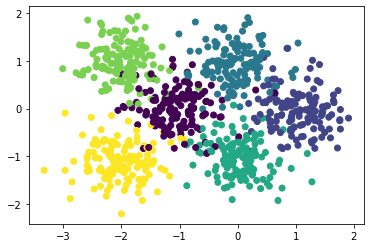

In [70]:
plt.scatter(x[:,0],x[:,1],c=y)

#### model

In [94]:
tf.random.set_seed(1234)
model=tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(120,activation='relu'),
        tf.keras.layers.Dense(40,activation='relu'),
        tf.keras.layers.Dense(6,activation='linear'),
    ]
)

In [95]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)

In [96]:
model.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 1.1104
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4282
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3343
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2875
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2870
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2960
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2503
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2291
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2324
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2081
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2140
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2088
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 2ms/step - loss: 0.1573
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1515
Epoch 103/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1894
Epoch 104/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1543
Epoch 105/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1488
Epoch 106/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570
Epoch 107/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1636
Epoch 108/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1465
Epoch 109/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1425
Epoch 110/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1419
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1532
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1529
Epoch 113/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1010
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1177
Epoch 201/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1051
Epoch 202/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1019
Epoch 203/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1130
Epoch 204/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1194
Epoch 205/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1092
Epoch 206/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1160
Epoch 207/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1366
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1482
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1397
Epoch 210/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1624
Epoch 211/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0814
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 299/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0628
Epoch 300/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0612
Epoch 301/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0527
Epoch 302/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0613
Epoch 303/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0715
Epoch 304/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0635
Epoch 305/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 306/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0607
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0710
Epoch 308/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0588
Epoch 309/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0436
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0483
Epoch 397/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0426
Epoch 398/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 399/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0686
Epoch 400/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0750
Epoch 401/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0907
Epoch 402/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1032
Epoch 403/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0748
Epoch 404/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0672
Epoch 406/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0706
Epoch 407/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0421
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0423
Epoch 495/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0414
Epoch 496/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0482
Epoch 497/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0480
Epoch 498/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0398
Epoch 499/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0438
Epoch 500/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0404
Epoch 501/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0339
Epoch 502/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0325
Epoch 503/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0320
Epoch 504/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0298
Epoch 505/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2163
Epoch 592/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2678
Epoch 593/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2994
Epoch 594/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2009
Epoch 595/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1583
Epoch 596/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1985
Epoch 597/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1680
Epoch 598/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2171
Epoch 599/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1470
Epoch 600/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1193
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0897
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0766
Epoch 603/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0470
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0407
Epoch 691/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0405
Epoch 692/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0392
Epoch 693/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0407
Epoch 694/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0359
Epoch 695/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0334
Epoch 696/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0318
Epoch 697/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0319
Epoch 698/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0353
Epoch 699/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0376
Epoch 700/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0375
Epoch 701/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0715
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0648
Epoch 789/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1446
Epoch 790/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1397
Epoch 791/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0831
Epoch 792/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0815
Epoch 793/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0716
Epoch 794/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0765
Epoch 795/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0728
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0849
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0628
Epoch 798/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0689
Epoch 799/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0306
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0300
Epoch 887/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0273
Epoch 888/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 889/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 890/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0251
Epoch 891/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0222
Epoch 892/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0258
Epoch 893/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0249
Epoch 894/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 895/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 896/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0230
Epoch 897/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 985/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 986/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 987/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 988/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 989/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 990/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0412
Epoch 991/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0398
Epoch 992/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0637
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1032
Epoch 994/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1062
Epoch 995/1000
13/1

In [97]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 120)               360       
                                                                 
 dense_7 (Dense)             (None, 40)                4840      
                                                                 
 dense_8 (Dense)             (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________


In [98]:
def eval_cat_err(y_hat,y):
    m=len(y)
    incorrect=0
    for i in range(m):
        if y_hat[i]!=y[i]:
            incorrect+=1
    cerr=incorrect/m
    return cerr

In [99]:
y_hat=[i.argmax() for i in model.predict(x_train)]
train_err=eval_cat_err(y_hat,y_train)
y_hat=[i.argmax() for i in model.predict(x_cv)]
cv_err=eval_cat_err(y_hat,y_cv)
print(f'train_err {train_err}')
print(f'cv_err {cv_err}')

10/10 [==============================] - 0s 1ms/step
train_err 0.015
cv_err 0.13125


In [100]:
np.amax(model.predict(x_train))

13/13 [==============================] - 0s 1ms/step


85.00576417726293

In [101]:
#### regularization

In [102]:
tf.random.set_seed(1234)
model_r=tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(120,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(40,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(6,activation='linear'),
    ]
)
model_r.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)
model_r.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
13/13 [==============================] - 0s 2ms/step - loss: 4.4468
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.7099
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.3491
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.0912
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.0128
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9739
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9503
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8963
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8229
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7764
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7672
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7596
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 2ms/step - loss: 0.4887
Epoch 102/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4761
Epoch 103/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4754
Epoch 104/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4696
Epoch 105/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5087
Epoch 106/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4508
Epoch 107/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4645
Epoch 108/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4738
Epoch 109/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4594
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4582
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4545
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4543
Epoch 113/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4096
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4046
Epoch 201/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4274
Epoch 202/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3965
Epoch 203/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3990
Epoch 204/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4100
Epoch 205/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4588
Epoch 206/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4329
Epoch 207/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4111
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4176
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4404
Epoch 210/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4142
Epoch 211/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3886
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3920
Epoch 299/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3942
Epoch 300/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4263
Epoch 301/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3934
Epoch 302/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3919
Epoch 303/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3890
Epoch 304/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3827
Epoch 305/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3813
Epoch 306/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3920
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3939
Epoch 308/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3890
Epoch 309/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3946
Epoch 396/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3800
Epoch 397/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3921
Epoch 398/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3775
Epoch 399/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3757
Epoch 400/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3736
Epoch 401/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3601
Epoch 402/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3627
Epoch 403/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3614
Epoch 404/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3639
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3560
Epoch 406/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3617
Epoch 407/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3512
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3564
Epoch 495/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3534
Epoch 496/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3754
Epoch 497/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3984
Epoch 498/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3491
Epoch 499/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3462
Epoch 500/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3629
Epoch 501/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3569
Epoch 502/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3595
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3814
Epoch 504/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3636
Epoch 505/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3528
Epoch 592/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3472
Epoch 593/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3434
Epoch 594/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3435
Epoch 595/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4222
Epoch 596/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3997
Epoch 597/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3592
Epoch 598/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3461
Epoch 599/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3436
Epoch 600/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3545
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3353
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3440
Epoch 603/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3988
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3715
Epoch 691/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3488
Epoch 692/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3561
Epoch 693/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3463
Epoch 694/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3506
Epoch 695/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3407
Epoch 696/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3398
Epoch 697/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3378
Epoch 698/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3526
Epoch 699/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3466
Epoch 700/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3508
Epoch 701/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3380
Epoch 788/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3314
Epoch 789/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3374
Epoch 790/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3367
Epoch 791/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3774
Epoch 792/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3759
Epoch 793/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3583
Epoch 794/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3610
Epoch 795/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3587
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3788
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3273
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3700
Epoch 799/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3694
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3455
Epoch 887/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3377
Epoch 888/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3415
Epoch 889/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3440
Epoch 890/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3375
Epoch 891/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3401
Epoch 892/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3502
Epoch 893/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3612
Epoch 894/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3477
Epoch 895/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3927
Epoch 896/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3555
Epoch 897/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3178
Epoch 984/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3328
Epoch 985/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3505
Epoch 986/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3511
Epoch 987/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3496
Epoch 988/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3225
Epoch 989/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3364
Epoch 990/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3462
Epoch 991/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3509
Epoch 992/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3667
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3648
Epoch 994/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3411
Epoch 995/1000
13/1

In [104]:
model_r.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 120)               360       
                                                                 
 dense_10 (Dense)            (None, 40)                4840      
                                                                 
 dense_11 (Dense)            (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________


In [106]:
y_hat=[i.argmax() for i in model_r.predict(x_train)]
train_err_r=eval_cat_err(y_hat,y_train)
y_hat=[i.argmax() for i in model_r.predict(x_cv)]
cv_err_r=eval_cat_err(y_hat,y_cv)
print(f'train_err {train_err}, train_err_r {train_err_r}')
print(f'cv_err {cv_err}, cv_err_r {cv_err_r}')

10/10 [==============================] - 0s 1ms/step
train_err 0.015, train_err_r 0.065
cv_err 0.13125, cv_err_r 0.05625
